<a href="https://colab.research.google.com/github/abpZ3R0/LOAN-DATA/blob/main/Loan%20Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import PyTorch libraries
import torch
from torch import nn
import torch.nn.functional as F

# Import visualization library
import matplotlib.pyplot as plt


torch.__version__

'2.1.0+cu121'

In [ ]:
# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('A {} device was detected.'.format(device))


if device=='cuda':
    print (torch.cuda.get_device_name(device=device))

A cpu device was detected.


In [ ]:
# Use Pandas to do our dataprocessing on the dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/abpZ3R0/LOAN-DATA/main/Test%20data%20main.csv'
df = pd.read_csv(url)


df.head(10)

,Area Name,Schm Desc,Rate,Sanct Lim,Balance,Status
0,5,16,11.25,50000.0,50000.00,1
1,5,5,9.00,155000.0,147086.14,1
2,3,16,9.00,390000.0,-325.99,1
3,9,4,9.00,200000.0,162704.76,1
4,1,4,9.00,900000.0,634506.55,1
5,11,7,9.00,600000.0,600000.00,1
6,2,4,9.00,330000.0,261424.39,1
7,9,5,9.00,230000.0,230000.00,1
8,3,5,9.00,628500.0,620167.12,1
9,9,4,9.00,600000.0,449446.70,1


In [ ]:
# Check the size/shape of our dataset
df.shape

(1346, 6)

In [ ]:

StatusMean = df['Status'].mean()
StatusStd = df['Status'].std()
df['Status'] = (df['Status']-StatusMean)/StatusStd

SanctLimMean = df['Sanct Lim'].mean()
SanctLimStd = df['Sanct Lim'].std()
df['Sanct Lim'] = (df['Sanct Lim']-SanctLimMean)/SanctLimStd

SchmDescMean = df['Schm Desc'].mean()
SchmDescStd = df['Schm Desc'].std()
df['Schm Desc'] = (df['Schm Desc']-SchmDescMean)/SchmDescStd

RateMean = df['Rate'].mean()
RateStd = df['Rate'].std()
df['Rate'] = (df['Rate']-RateMean)/RateStd

BalanceMean = df['Balance'].mean()
BalanceStd = df['Balance'].std()
df['Balance'] = (df['Balance']-BalanceMean)/BalanceStd

AreaMean = df['Area Name'].mean()
AreaStd = df['Area Name'].std()
df['Area Name'] = (df['Area Name']-AreaMean)/AreaStd

print(StatusMean)
print(StatusStd)
print(SanctLimMean)
print(SanctLimStd)
print(RateMean)
print(RateStd)
print(SchmDescMean)
print(SchmDescStd)
print(BalanceMean)
print(BalanceStd)
print(AreaMean)
print(AreaStd)

-3.695244539614191e-17
1.0
3.1673524625264494e-17
1.0
2.639460385438708e-18
1.0
8.710219271947736e-17
1.0
-3.959190578158062e-17
1.0
-3.959190578158062e-17
1.0


In [ ]:
df.head(10)

,Area Name,Schm Desc,Rate,Sanct Lim,Balance,Status
0,-0.375723,2.642634,1.044680,-0.338320,-0.255256,-0.218044
1,-0.375723,-0.143979,0.043404,-0.275706,-0.187572,-0.218044
2,-0.986131,2.642634,0.043404,-0.135569,-0.290341,-0.218044
3,0.845094,-0.397308,0.043404,-0.248871,-0.176684,-0.218044
4,-1.596540,-0.397308,0.043404,0.168557,0.152234,-0.218044
5,1.455502,0.362678,0.043404,-0.010341,0.128177,-0.218044
6,-1.291336,-0.397308,0.043404,-0.171349,-0.107861,-0.218044
7,0.845094,-0.143979,0.043404,-0.230982,-0.129769,-0.218044
8,-0.986131,-0.143979,0.043404,0.006655,0.142237,-0.218044
9,0.845094,-0.397308,0.043404,-0.010341,0.023219,-0.218044


In [ ]:
# Extract the inputs and create a PyTorch tensor x (inputs)
inputs = ['Area Name','Schm Desc',	'Rate',	'Sanct Lim',	'Balance']
x = torch.tensor(df[inputs].values, dtype=torch.float, device=device)

outputs = ['Status']
y = torch.tensor(df[outputs].values,dtype=torch.float, device=device)

In [ ]:
x[0:10]

tensor([[-0.3757,  2.6426,  1.0447, -0.3383, -0.2553],
        [-0.3757, -0.1440,  0.0434, -0.2757, -0.1876],
        [-0.9861,  2.6426,  0.0434, -0.1356, -0.2903],
        [ 0.8451, -0.3973,  0.0434, -0.2489, -0.1767],
        [-1.5965, -0.3973,  0.0434,  0.1686,  0.1522],
        [ 1.4555,  0.3627,  0.0434, -0.0103,  0.1282],
        [-1.2913, -0.3973,  0.0434, -0.1713, -0.1079],
        [ 0.8451, -0.1440,  0.0434, -0.2310, -0.1298],
        [-0.9861, -0.1440,  0.0434,  0.0067,  0.1422],
        [ 0.8451, -0.3973,  0.0434, -0.0103,  0.0232]])

In [ ]:
y[0:10]

tensor([[-0.2180],
        [-0.2180],
        [-0.2180],
        [-0.2180],
        [-0.2180],
        [-0.2180],
        [-0.2180],
        [-0.2180],
        [-0.2180],
        [-0.2180]])

In [ ]:
# Define your PyTorch neural network
# Number of Inputs: 4
# Number of Hidden Units: 100
# Number of Hidden Layers: 2
# Activation Function:  Relu
# Number of Ouputs: 1
model = nn.Sequential(
            nn.Linear(5,100),
            nn.ReLU(),
            nn.Linear(100,200),
            nn.ReLU(),
            nn.Linear(200,200),
            nn.ReLU(),
            nn.Linear(200,1),
        )

# Move it to either the CPU or GPU depending on what we have available
model.to(device)
print(model(x[333]))

tensor([0.0063], grad_fn=<ViewBackward0>)


In [ ]:
ypred = model(x[333])
print(ypred)

tensor([0.0063], grad_fn=<ViewBackward0>)


In [ ]:
from re import X
import torch.optim as optim

# Meausure our neural network by mean square error
criterion =  nn.MSELoss()


# Train our network with a simple SGD approach
optimizer = optim.Adam(model.parameters(), lr=0.00001)
#print (criterion(model.forward(x[0:10]), y[0:10]))
# Train our network a using the entire dataset 5 times
count = 0
for epoch in range(1000):
    totalLoss = 0
    count = count +1

    for i in range(len(x)):

        # Single Forward Pass
        ypred = model.forward(x[i])
        # Measure how well the model predicted vs actual
        loss = criterion(ypred, y[i])
        #print ("Loss: ", loss)

        # Track how well the model predicted
        totalLoss+=loss.item()

        # Update the neural network
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print out our loss after each training iteration

    print ( count, "Total Loss: ", totalLoss)

1 Total Loss:  46.11067768653295
2 Total Loss:  46.310716283286624
3 Total Loss:  46.18035139565255
4 Total Loss:  46.323056436834406
5 Total Loss:  46.10255453648064
6 Total Loss:  46.26229679001476
7 Total Loss:  46.15323099938827
8 Total Loss:  46.3286367571868
9 Total Loss:  46.16358751967776
10 Total Loss:  46.30080162521925
11 Total Loss:  46.149359153424896
12 Total Loss:  46.281367631951014
13 Total Loss:  46.16313391369239
14 Total Loss:  46.28690741623207
15 Total Loss:  46.15473034478596
16 Total Loss:  46.38771853004755
17 Total Loss:  46.13820029223052
18 Total Loss:  46.312725443195745
19 Total Loss:  46.164961957499656
20 Total Loss:  46.23993745373133
21 Total Loss:  46.04971147558899
22 Total Loss:  46.292012001704734
23 Total Loss:  46.111971424233104
24 Total Loss:  46.25529931999391
25 Total Loss:  46.14488943837624
26 Total Loss:  46.23019113311983
27 Total Loss:  46.171437498905874
28 Total Loss:  46.243711354958094
29 Total Loss:  46.16301616129334
30 Total Loss:

In [ ]:
#import pickle

In [ ]:
#with open ('Neural_Network.pkl' , 'wb') as file :
    #pickle.dump(model , file)

In [ ]:
# Plot predictions vs. true values
@torch.no_grad()
def graphPredictions(model, x, y , minValue, maxValue):

    model.eval()                               # Set the model to inference mode

    predictions=[]                             # Track predictions
    actual=[]                                  # Track the actual labels

    x.to(device)
    y.to(device)
    model.to(device)

    for i in range(len(x)):

        # Single forward pass
        pred = model(x[i])

        # Un-normalize our prediction
        pred = pred*StatusStd+StatusMean
        act = y[i]*StatusStd+StatusMean

        # Save prediction and actual label
        predictions.append(pred.tolist())
        actual.append(act.item())

    # Plot actuals vs predictions
    plt.scatter(actual, predictions)
    plt.xlabel('Actual Status')
    plt.ylabel('Predicted Status')
    plt.plot([minValue,maxValue], [minValue,maxValue])
    plt.xlim(minValue, maxValue)
    plt.ylim(minValue, maxValue)

    # Make the display equal in both dimensions
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

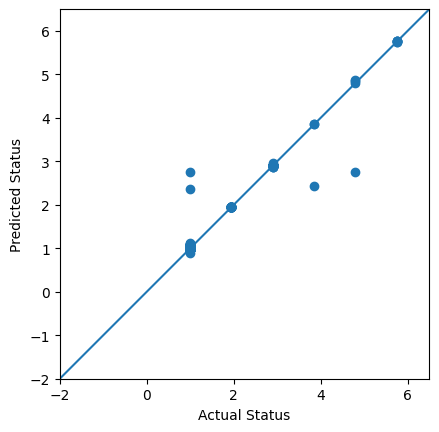

In [ ]:
graphPredictions(model, x, y, -2,6.5)

In [ ]:
import pickle
NN_model = pickle.load(open('/content/Neural_Network.pkl' , 'rb'))

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/abpZ3R0/LOAN-DATA/main/TEST%20DT%20-%20Report%201.csv'
df = pd.read_csv(url)

In [ ]:

Y = df['Status']
SanctLimMean = df['Sanct Lim'].mean()
SanctLimStd = df['Sanct Lim'].std()

SchmDescMean = df['Schm Desc'].mean()
SchmDescStd = df['Schm Desc'].std()

RateMean = df['Rate'].mean()
RateStd = df['Rate'].std()

BalanceMean = df['Balance'].mean()
BalanceStd = df['Balance'].std()
StatusMean = df['Status'].mean()
StatusStd = df['Status'].std()
AreaMean = df['Area Name'].mean()
AreaStd = df['Area Name'].std()
print(df.loc[[457]])
print(StatusMean)
print(StatusStd)

     Area Name  Schm Desc  Rate  Sanct Lim  Balance  Status
457          2          4  11.5     150000      0.0       4
1.12578125
0.5412963465179806


In [ ]:
# Data that affects the number of Schm Desc',	'Rate',	'Sanct Lim',	'Balance
Area_Name = 2
Schm_Desc =  4
Rate = 11.5
Sanct_Lim = 150000
Balance = 0.0
actual = Y[457]



# Normalize our inputs using the same values for our training
Area_Name = (Area_Name-AreaMean)/AreaStd
Schm_Desc = (Schm_Desc-SchmDescMean)/ SchmDescStd
Rate = (Rate - RateMean)/ RateStd
Sanct_Lim = (Sanct_Lim- SanctLimMean) / SanctLimStd
Balance = (Balance - BalanceMean) / BalanceStd

# Create our input tensor
x1 = torch.tensor([Area_Name, Schm_Desc ,	Rate ,	Sanct_Lim,	Balance],dtype=float)

# Pass the input into the neural network
y1 = NN_model(x1.float())

# Un-normalize our output y1
y1 = y1*StatusStd+StatusMean

# Compare what your network predicted to the actual
print ("Neural Network Predicts: ", y1.item())
print ("Actual Result: ", actual)




NameError: ignored